<a href="https://colab.research.google.com/github/bhudolbhardwaj/Machine-Learning/blob/master/churnpredictionfinalmanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Extraction And Library Import**

Basically we have to predict churn based on datas given out here .i.e.(0/1). We can clearly say that its a classification pblm

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

reading columns


In [7]:
dataset=pd.read_csv('churn_prediction.csv')
dataset.columns


Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

last column is churn so we have to put it in y variable as dependent variable

In [8]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 1])

we have now dependent variable in one variable now look for independents

In [9]:
x

array([[3135, 66, 'Male', ..., 0.2, 1458.71, 1458.71],
       [310, 35, 'Male', ..., 100.56, 6496.78, 8787.61],
       [2356, 31, 'Male', ..., 259.23, 5006.28, 5070.14],
       ...,
       [297, 47, 'Male', ..., 71.8, 61078.5, 57564.24],
       [2585, 50, 'Male', ..., 0.2, 1625.55, 1625.55],
       [2349, 18, 'Male', ..., 1094.09, 2402.62, 3260.58]], dtype=object)

we can clearly see that we have x, droping first and last column as we don't need customer id for prediction

**Data Exploration And Manipulation**

missing values

In [0]:
dataset.describe(include='all')

In [11]:
dataset.shape

(28382, 21)

By upper two command we can sure that target variable has no missing values , only few have missing values

In [12]:
dataset.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [13]:
dataset["churn"].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

1.>gender since it is categorical variable better to repplace with mode value

In [14]:
dataset["gender"].fillna(value=(dataset['gender'].mode()[0]),inplace=True)
dataset["gender"].isnull().sum()

0

2.> Dependents

In [26]:
dataset["dependents"].value_counts()


0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

one thing in my observation that if a person is male or above 50 then dependents is greater that 0 in many cases. 

In [0]:
dataset["dependents"].fillna(value=100,inplace=True)

In [0]:
for i in range(len(dataset)):
  if dataset["dependents"][i]==100:
    if dataset["gender"][i]=="Male" and dataset["age"][i]>50:
      dataset["dependents"][i]=2
    else:
      dataset["dependents"][i]=0

In [30]:

dataset["dependents"].value_counts()

0.0     23272
2.0      2776
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [31]:
dataset['dependents'].isnull().sum()

0

3.> city and occupation

In [32]:
dataset["occupation"].fillna(value=(dataset['occupation'].mode()[0]),inplace=True)
dataset["city"].fillna(value=(dataset['city'].mode()[0]),inplace=True)
dataset.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

last thing left and that is days_since_last_transaction 

In [33]:
dataset["days_since_last_transaction"].value_counts(sort=True)

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

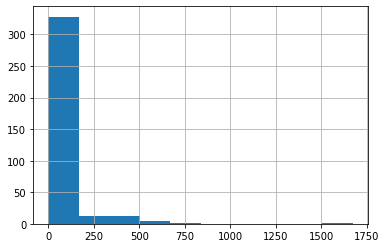

In [34]:
dataset["days_since_last_transaction"].value_counts(sort=True).hist()

we can see that many data bw 0 to 150 have many option so we will take mean from 0 to 20 bcz many data lies there

In [0]:
dataset["days_since_last_transaction"].fillna(value= np.mean([0,1,2,3,4,5,6,7,8,9,10]),inplace=True)

final look

In [36]:
dataset.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

no missing values

**Data encoding**

In [37]:
dataset.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

one hot encoding on gender since there is no order

In [0]:
dataset['gender']=pd.get_dummies(dataset['gender'])

but in case of occupation we might say there is an order

In [39]:
dataset['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(['self_employed','salaried','student','retired','company'])

array([3, 2, 4, 1, 0])

labelencoder chhoses alphabetical order

In [0]:
dataset['occupation']=dataset['occupation'].map({'self_employed':1,
                                                 'salaried':2,
                                                 'student':0,
                                                 'retired':4,
                                                 'company':3})

**WE ARE DONE WITH DATAS**

In [0]:
x=dataset.iloc[:,1:-1].values
x

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

**logistic regression**

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train, y_train)

In [53]:
from sklearn import metrics
prediction_test1 = model.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test1))

0.8226175797075921


**random forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

In [55]:
from sklearn import metrics
prediction_test2 = clf.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test2))

0.8650695790029945


**Naive bayes**

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
from sklearn import metrics
prediction_test3 = classifier.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test3))

0.8104632728553813


**ensembling these two**

In [0]:
from statistics import mode
final_pred=np.array([])
for i in range(0,len(x_test)):
  final_pred=np.append(final_pred,mode([prediction_test1[i],prediction_test2[i],prediction_test3[i]]))

**final accuracy**

In [64]:
from sklearn import metrics
# Print the prediction accuracy
print (metrics.accuracy_score(y_test,final_pred))

0.8227937290822618
